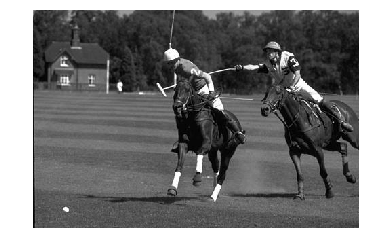

In [2]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import cv2
img = imread('Image3.jpg')
#imggray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imggray = rgb2gray(img)
plt.imshow(imggray, cmap="gray")
#plt.imshow(img)
plt.axis("off")

plt.show()

In [3]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, sobel_x, mode='same')
def gradient_y(imggray):
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, sobel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [4]:
Ixx = I_x**2
Ixy = I_y*I_x
Iyy = I_y**2

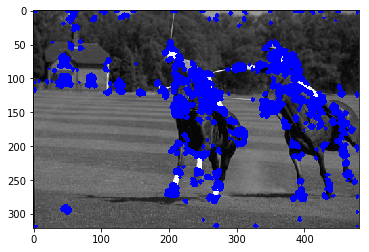

In [5]:
import numpy as np
from numpy import linalg as LA

img_copy2=cv2.cvtColor(imggray, cv2.COLOR_GRAY2RGB)
h,w = imggray.shape
shi_tomasi_response = []
D = np.zeros((2,2))
#print(h,w)
img_resp = np.zeros((h,w))
window_size = 5
offset = window_size//2
for y in range(offset, h-offset):
    for x in range(offset, w-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        D[0, 0] = Sxx
        D[0, 1] = Sxy
        D[1, 0] = Sxy
        D[1, 1] = Syy
        val, vec = LA.eig(D)
        e = min(val[0], val[1])
        if(e>100000):
            img_resp[y][x] = e
            cv2.circle(img_copy2,(x,y),2,(0, 0, 255),-1)
        else:
            img_resp[y][x] = 0
        #print(e)
        shi_tomasi_response.append((x,y,e))
#    print(Ixx)
cv2.imwrite("HW_1_Q_2_st_Solns/image_3_before.jpg",img_copy2)
plt.imshow(img_copy2)
plt.show()

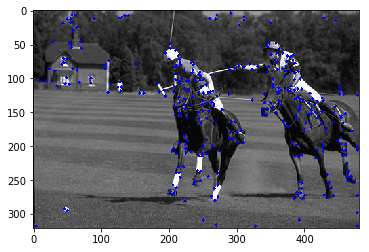

In [6]:

img_copy=cv2.cvtColor(imggray, cv2.COLOR_GRAY2RGB)
#print(img_copy.shape)
#img_copy = img
plt.imshow(img_copy)
ws = 5
#for response in shi_tomasi_response:
#   print(response)
"""for response in shi_tomasi_response:
    x, y, e = response
    #1000000000000
    if e > 100000:
        #img_copy[y,x] = 250
        img_copy[y,x] = (250, 0 ,0)
        #print(img_copy[y,x])
plt.imshow(img_copy, cmap="gray")
plt.show()
"""
I = np.zeros((ws,ws))
for j in range(ws//2,h-(ws//2)):
    for i in range(ws//2,w-(ws//2)):
        check_arr = np.array(img_resp[j:j+ws, i:i+ws])
        maxpix = np.amax(check_arr)
        #print(maxpix)
        if(maxpix!=0):
            maxloc = np.where(check_arr == np.amax(check_arr))
            if(check_arr[ws//2][ws//2]==maxpix):
                #img_copy[j+maxloc[0], i+maxloc[1]] = (255, 0, 0)
                cv2.circle(img_copy,(i+maxloc[1],j+maxloc[0]),2,(0, 0, 255),-1)
cv2.imwrite("HW_1_Q_2_st_Solns/image_3_after.jpg",img_copy)
plt.imshow(img_copy)
plt.show()